# COMP 4304 Project 
## Iteration 1

This is the first iteration of the Data Visualisation course project, we will be exploring the data set "flights.csv" containing information about all commercial and private aviation occurrences (accidents) occurring within Canada over the past 25 years.
The dataset provided by the Transportation Safety Board of Canada contains information about aircraft incidents and accidents that have happened in Canada. It includes various details about the incidents, such as the date and time, airport codes and names, location, incident type, aircraft information, and more:

The dataset has 26 columns and 10,156 rows. Each row represents a unique aircraft incident, and each column provides information about the specific incident.

The columns in the dataset are:

**1- id**: A unique identifier for the incident.

**2- date**: The date and time of the incident.

**3- airport_code**: The code for the airport where the incident occurred.

**4- airport_name**: The name of the airport where the incident occurred.

**5- airport_province**: The province where the airport is located.

**6- location**: The location of the airport.

**7- region**: The region where the airport is located.

**8- latitude**: The latitude of the airport.

**9- longitude**: The longitude of the airport.

**10- incident_type**: The type of incident that occurred (e.g., SMOKE OR FIRE, ENGINE FAILURE).

**11- reportable_incident**: Whether the incident was reportable to the Transportation Safety Board of Canada.

**12- incident_country**: The country where the incident occurred.

**13- serious_incident**: Whether the incident was considered serious (i.e., it posed a threat to the safety of the aircraft).

**14- damage**: The extent of damage to the aircraft (if any).

**15- total_injured**: The total number of people injured in the incident.

**16- total_uninjured**: The total number of people uninjured in the incident.

**17- aircraft_id**: The unique identifier for the aircraft involved in the incident.

**18- aircraft_type**: The type of aircraft involved in the incident (e.g., AEROPLANE, HELICOPTER).

**19- aircraft_model**: The model of the aircraft involved in the incident.

**20- aircraft_make** : The make of the aircraft that was involved in the incident.

**21- organization**: The organization of the airline operators ( AIR CANADA, WESTJET, SKYSERVICE BUSINESS AVIATION INC.) 

**22- operator_type**: The type of the aircraft operator (COMMERCIAL, PRIVATE, STATE).

**23- operation_type**: The type of aircraft operation (AIR TRTANSPORT, TRAINING, PLEASURE/TRAVEL, BUSINESS).

**24- destination_airport_code**: The code of the airport that the incident took place at.

**25- destination_airport_name**: The name of the aiport that the incident took place at.

**26- departure_airport_code**: The code of the aiport that the aircaft that took place in an incident departed from.

**27- departure_airport_name**: The name of the aiport that the aircaft that took place in an incident departed from.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import ipywidgets as widgets
from ipywidgets import Button
from ipywidgets import interact, interact_manual
## loading the dataset onto our dataframe
df = pd.read_csv("flights.csv", parse_dates=['date'],  
                 index_col=["id"]).sort_index()
df.tail(5)

,date,airport_code,airport_name,airport_province,location,region,latitude,longitude,incident_type,reportable_incident,...,aircraft_type,aircraft_model,aircraft_make,organization,operator_type,operation_type,destination_airport_code,destination_airport_name,departure_airport_code,departure_airport_name
id,,,,,,,,,,,,,,,,,,,,,
156593,2022-12-04 12:20:00,NF4,(Lindsay),ONTARIO,Kawartha Lakes,ONTARIO,44.364722,78.783889,PILOT ERROR / WEATHER / MECHANICAL,ACCIDENT,...,AEROPLANE,172I,CESSNA,DURHAM FLIGHT CENTRE,PRIVATE,PLEASURE/TRAVEL,NF4,(Lindsay),YOO,Oshawa Executive
156599,2022-12-04 19:15:00,SU3,St-Hyacinthe,QUEBEC,St-Hyacinthe,QUEBEC,45.606667,73.015000,ENGINE (i),INCIDENT REPORTABLE,...,AEROPLANE,DA42,DIAMOND,CARGAIR - CARGAIR,COMMERCIAL,TRAINING,YHU,St-Hubert,YSC,SHERBROOKE
156603,2022-11-07 18:51:00,YMT,CHIBOUGAMAU/CHAPAIS,QUEBEC,CHIBOUGAMAU,QUEBEC,49.771944,74.528056,EMERGENCY/PRIORITY (xi),INCIDENT REPORTABLE,...,AEROPLANE,A100,BEECH,PROPAIR,COMMERCIAL,AIR TRANSPORT,YGL,LA GRANDE RIVIÈRE,YVP,KUUJJUAQ
156604,2022-11-07 19:20:00,YGP,Gaspé (Michel-Pouliot),QUEBEC,GASPÉ,QUEBEC,48.775278,64.479722,EMERGENCY/PRIORITY (xi),INCIDENT REPORTABLE,...,AEROPLANE,BA 32-12,BRITISH AEROSPACE,PASCAN AVIATION,COMMERCIAL,AIR TRANSPORT,YGR,ÎLES-DE-LA-MADELEINE,YGP,Gaspé (Michel-Pouliot)
156615,2022-12-10 14:06:00,YUL,Pierre Elliott Trudeau Intl,QUEBEC,Montreal,QUEBEC,45.470556,73.740833,SMOKE OR FIRE (iii),INCIDENT REPORTABLE,...,AEROPLANE,737-200,BOEING,AIR INUIT,COMMERCIAL,AIR TRANSPORT,YPX,PUVIRNITUQ,YUL,Pierre Elliott Trudeau Intl


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10155 entries, 92825 to 156615
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      10155 non-null  datetime64[ns]
 1   airport_code              10155 non-null  object        
 2   airport_name              10155 non-null  object        
 3   airport_province          10155 non-null  object        
 4   location                  10155 non-null  object        
 5   region                    10155 non-null  object        
 6   latitude                  10155 non-null  float64       
 7   longitude                 10155 non-null  float64       
 8   incident_type             10155 non-null  object        
 9   reportable_incident       10155 non-null  object        
 10  incident_country          10155 non-null  object        
 11  serious_incident          10155 non-null  object        
 12  damage       

In [3]:
df.isnull().sum()

date                        0
airport_code                0
airport_name                0
airport_province            0
location                    0
region                      0
latitude                    0
longitude                   0
incident_type               0
reportable_incident         0
incident_country            0
serious_incident            0
damage                      0
total_injured               0
total_uninjured             0
aircraft_id                 0
aircraft_type               0
aircraft_model              0
aircraft_make               0
organization                0
operator_type               0
operation_type              0
destination_airport_code    0
destination_airport_name    0
departure_airport_code      0
departure_airport_name      0
dtype: int64

Main Goal: Where should efforts be focused to improve the safety of Canadian air space?

Sub-Goal 1: What are the most common types of incidents and accidents in Canadian air space?

Sub-Goal 2: Are there any trends or patterns in incidents and accidents based on geographic regions in Canada?

Visualization 1 (Explanatory):

A horizontal bar chart showing the frequency of incident types (pilot error, mechanical, etc.) in Canadian air space over a given time period (e.g., past 5 years). This visualization will help convey the most common types of incidents and accidents that occur in Canadian air space, providing insight into where safety efforts may be needed most.

Visualization 2 (Exploratory):

A choropleth map of Canada showing the number of incidents and accidents per province/territory. This visualization will allow for exploration of any geographic patterns or trends in the data, such as if certain regions have a higher frequency of incidents and accidents than others.

Visualization 3 (Interactive):

A stacked bar chat showing the relationship between operator type and the severity of incidents and accidents. This visualization will allow users to interact with the data and explore how operator type may impact the severity of incidents and accidents.

Visualization 4 (Derived Data Types):

A network diagram showing the relationships between incident types, contributing factors, and outcomes. This visualization will use derived data types to show how different incident types (e.g., pilot error) may be connected to specific contributing factors (e.g., fatigue) and outcomes (e.g., minor injury). This will allow for a deeper understanding of the root causes of incidents and accidents in Canadian air space.


In the next steps, the changes could be made to the visualization selected for displaying data. For example, a horizontal bar graph for the first visualization can be designed to represent different incident type with different colours. Furthermore, an additional pie chart can be created for the second visualization to represent the number of incidents and accidents per province/territory. The map can be designed to represent the number of incidents using range method. For example, if Quebec has 498 incidents, and some other provinces has incidents between 400-500 range, then these range can reprsent some color and can be  displayed on map with the provinces within the same range reprsenting the same color. This can further be improved by additonal visualization(pie chart) which can represent the exact number of percentage of incidents in these provinces. 

### Additional potential sub-goals

1) Are there certain types of aircraft that are involved in more incidents or accidents than others?

2) Is there a relationship between the time of day, day of the week, or month of the year and the frequency of incidents or accidents?

3) Are there any trends in the data over time (i.e. are incidents or accidents becoming more or less common)?

4) Are there any correlations between the type of occurrence and the weather conditions at the time?

5) Are certain provinces or territories experiencing more incidents or accidents than others?

6) Is there a relationship between the severity of the occurrence (minor incident vs. major accident) and the phase of flight (takeoff, climb, cruise, descent, landing)?

7) Explore number of injuries based on organization and aircraft make specifically.


In [4]:
@interact(origin=(['COMMERCIAL'] + ['PRIVATE']))

def f(origin):
    if (origin == 'COMMERCIAL'):
        df1 = df[df.operator_type == 'COMMERCIAL']
    if (origin == 'PRIVATE'):
        df1 = df[df.operator_type == 'PRIVATE']
    df1 = df1[(df1['damage'] == 'MINOR') | (df1['damage'] == 'NONE') | (df1['damage'] == 'DESTROYED' ) | (df1['damage'] == 'SUBSTANTIAL' )]
    incidents_by_year = df1.groupby(['damage', 'operator_type']).size()
    
    incidents_by_year = incidents_by_year.unstack()
    incidents_by_year.plot.bar(figsize=(10,6))
    plt.xlabel('Damage')
    plt.ylabel('Number of operators')
    plt.title('Relationship between Operator Type and Severity of Incidents and Accidents')
    

interactive(children=(Dropdown(description='origin', options=('COMMERCIAL', 'PRIVATE'), value='COMMERCIAL'), O…

C:\Users\Dell\AppData\Local\Temp\ipykernel_23828\1703984023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['date'].astype(str)
C:\Users\Dell\AppData\Local\Temp\ipykernel_23828\1703984023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1.loc[:,'date'].str[0:4]


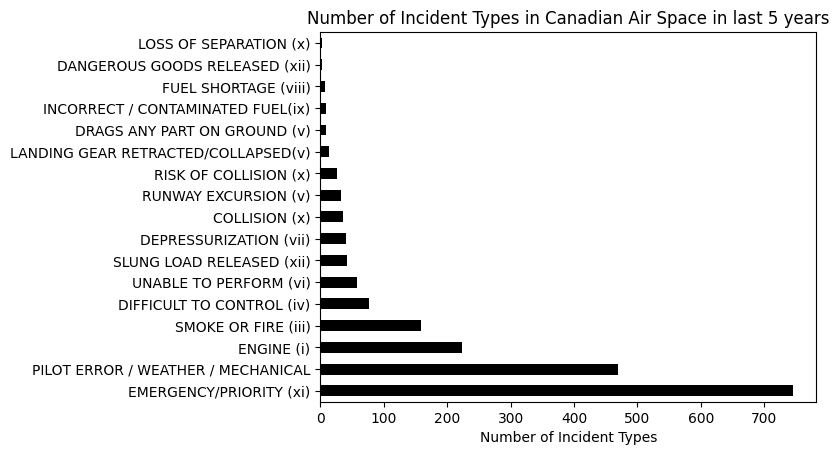

In [5]:
df1 = df[df['date'] >= '2018-01-01']
df1['date'] = df1['date'].astype(str)


df1['Year'] = df1.loc[:,'date'].str[0:4]




incident_counts = df1['incident_type'].value_counts()

incident_counts.plot.barh(color = ['black'])


plt.title('Number of Incident Types in Canadian Air Space in last 5 years')
plt.xlabel('Number of Incident Types')



plt.show()

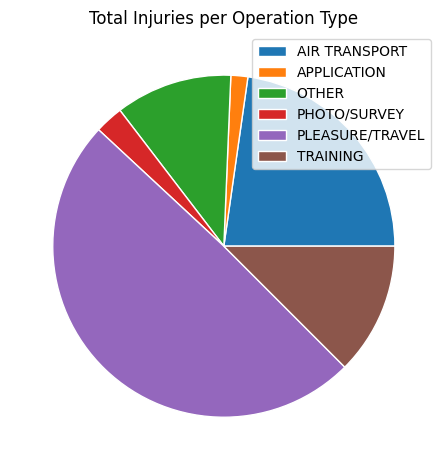

In [6]:
incidents_by_type = df[['total_injured','operation_type']].groupby('operation_type').sum().reset_index().sort_values(by='total_injured', ascending = False)

top_5 = incidents_by_type.head(5).operation_type

incidents_by_type['operation_category'] = incidents_by_type['operation_type']

incidents_by_type.loc[~incidents_by_type['operation_type'].isin(top_5), 'operation_category'] = 'OTHER'

grouped_df = incidents_by_type[['operation_category', 'total_injured']].groupby(['operation_category']).sum().reset_index()


fig, ax = plt.subplots()

a = ax.pie(grouped_df['total_injured'], radius=1 , wedgeprops ={'edgecolor':'w'})

ax.set(title='Total Injuries per Operation Type')
plt.legend(labels = grouped_df['operation_category'] , loc="best")
fig.tight_layout()
plt.show()


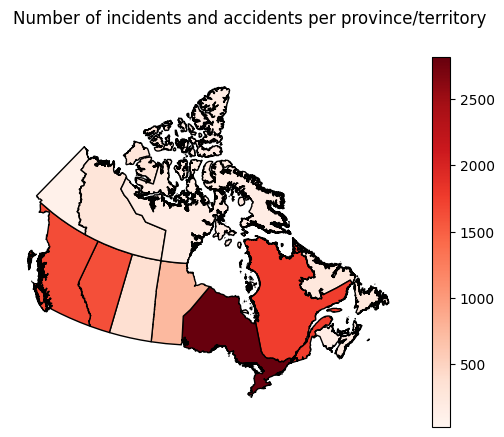

In [7]:
df1 = df['airport_province'].value_counts().to_frame().reset_index()
df1 = df1.rename(columns={'index': 'Province', 'airport_province': 'count'})
gdf = geopandas.read_file('canada.shp')
gdf['Province']= gdf['Province'].str.upper()
gdf = gdf.merge(df1, on='Province', how='left')
fig, ax = plt.subplots()
fig.suptitle('Number of incidents and accidents per province/territory')
gdf.plot('count', cmap='Reds', ax=ax, edgecolor='black', legend=True)
ax.set_axis_off()